In [1]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import scipy.stats as stats

%matplotlib inline
plt.style.use("default")


# Multiple Output display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
dataset = pd.read_csv(r'C:\Users\rol3x\MAIN_PATH\Bank-additional-full.csv', delimiter = ";")
dataset.shape
dataset.head(10)

(41188, 21)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
dataset.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# Overall Response

Text(0.5, 1.0, 'Yes/No (Response Rate)')

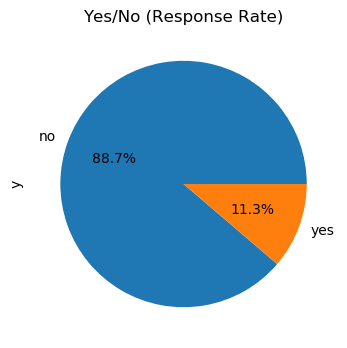

In [5]:
f = plt.figure(figsize=(6,4))

plt.title('Yes/No (Response Rate)')
dataset["y"].value_counts().plot(kind = "pie", autopct='%1.1f%%')
plt.savefig('overall_repsonse.png', dpi=80)


Text(0.5, 1.0, 'age (overall)')

Text(0.5, 1.0, 'age (yes)')

Text(0.5, 1.0, 'age (no)')

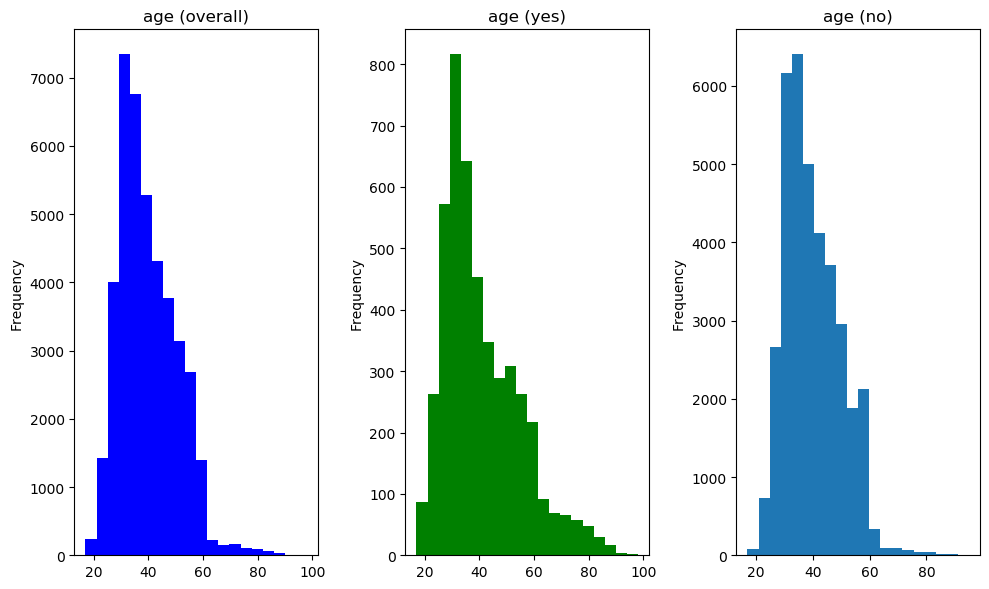

In [6]:
f = plt.figure(figsize=(10,6))
plt.subplot(131)
plt.title('age (overall)')
Output = None
dataset["age"].plot(kind = "hist", bins = 20,color='b')
plt.subplot(132)
plt.title('age (yes)')
dataset["age"][dataset["y"] == "yes"].plot(kind = "hist", bins = 20,color='g')
plt.subplot(133)
plt.title('age (no)')
dataset["age"][dataset["y"] == "no"].plot(kind = "hist", bins = 20)
plt.tight_layout()
plt.savefig('age_distribution.png', dpi=1000)

# Age to mean Standard Deviation


In [7]:
dataset_age_yes = dataset["age"][dataset["y"] == "yes"]
dataset_age_no = dataset["age"][dataset["y"] == "no"]

rows_yes = dataset_age_yes.shape[0]
rows_no = dataset_age_no.shape[0]

mean_age_yes = np.mean(dataset_age_yes)
mean_age_no = np.mean(dataset_age_no)

std_dev_age_yes = np.std(dataset_age_yes)
std_dev_age_no = np.std(dataset_age_no)


std_error = (std_dev_age_yes**2/rows_yes + std_dev_age_no**2/rows_no)**0.5
Difference_mean = mean_age_yes - mean_age_no

Upper_bound_95_confidence_Interval = round(Difference_mean + 1.96*std_error, 3)
Lower_bound_95_confidence_Interval = round(Difference_mean - 1.96*std_error, 3)
print("The 95% confidence interval of the difference of means is [", Lower_bound_95_confidence_Interval, ", ", Upper_bound_95_confidence_Interval, "]")

The 95% confidence interval of the difference of means is [ 0.591 ,  1.413 ]


# % of poeple by age who responded "yes" vs. those with "no"

# Job

Text(0.5, 1.0, '% Job (overall)')

Text(0.5, 1.0, '% Job (no)')

Text(0.5, 1.0, '% Job (yes)')

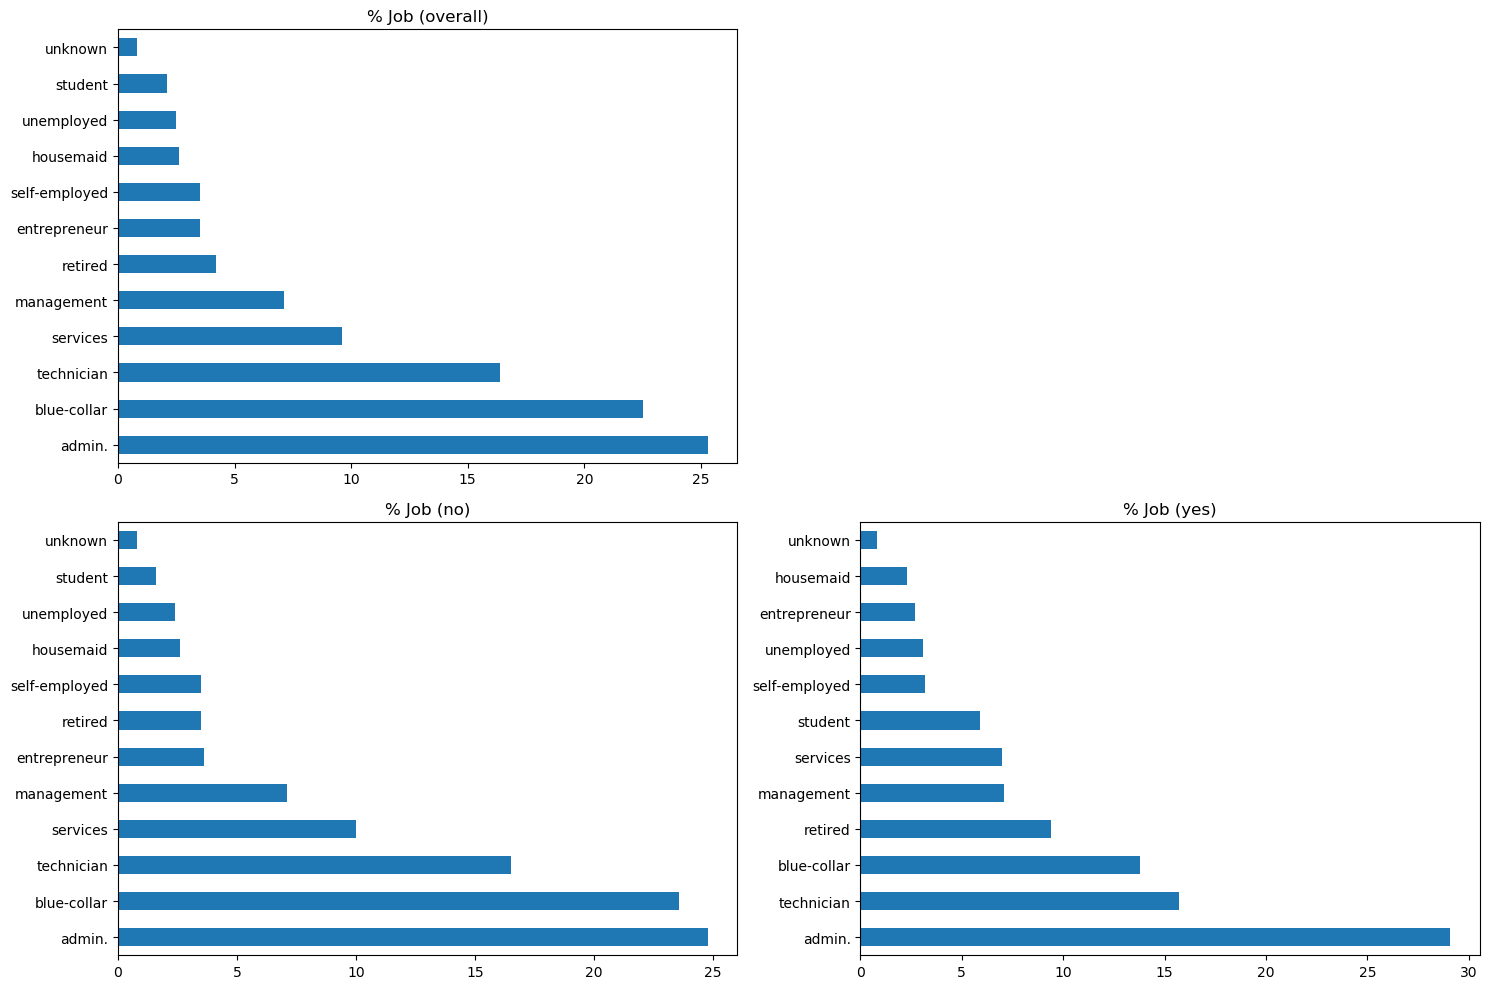

In [8]:
f = plt.figure(figsize=(15,10))

plt.subplot(221)
plt.title('% Job (overall)')
jobs_dist = dataset["job"].value_counts()
jobs_overall = round(jobs_dist/(jobs_dist.sum())*100,1)
jobs_overall.plot(kind = "barh")

plt.subplot(223)
plt.title('% Job (no)')
jobs_dist_no = dataset["job"][dataset["y"] == "no"].value_counts()
jobs_no = round(jobs_dist_no/(jobs_dist_no.sum())*100,1)
jobs_no.plot(kind = "barh")

plt.subplot(224)
plt.title('% Job (yes)')
jobs_dist_yes = dataset["job"][dataset["y"] == "yes"].value_counts()
jobs_yes = round(jobs_dist_yes/(jobs_dist_yes.sum())*100,1)
jobs_yes.plot(kind = "barh")

plt.savefig('job.png', dpi=1000)

plt.tight_layout()

# Chi-square Test on the Job Category

In [9]:
job_yes = dataset["job"][dataset["y"] == "yes"].value_counts()
job_yes
job_no = dataset["job"][dataset["y"] == "no"].value_counts()
job_no

job_yes_arranged = [job_yes["admin."], job_yes["technician"], job_yes["blue-collar"], job_yes["retired"], job_yes["management"], job_yes["services"],
job_yes["student"], job_yes["self-employed"], job_yes["unemployed"], job_yes["entrepreneur"], job_yes["housemaid"],job_yes["unknown"]]

job_no_arranged = [job_no["admin."], job_no["technician"], job_no["blue-collar"], job_no["retired"], job_no["management"], job_no["services"],
job_no["student"], job_no["self-employed"], job_no["unemployed"], job_no["entrepreneur"], job_no["housemaid"],job_no["unknown"]]
                                                      
obs = np.array([job_yes_arranged, job_no_arranged])
obs
chi2, p, dof, expected = stats.chi2_contingency(obs)
print("p value of chi-square test: ", p)

admin.           1352
technician        730
blue-collar       638
retired           434
management        328
services          323
student           275
self-employed     149
unemployed        144
entrepreneur      124
housemaid         106
unknown            37
Name: job, dtype: int64

admin.           9070
blue-collar      8616
technician       6013
services         3646
management       2596
entrepreneur     1332
retired          1286
self-employed    1272
housemaid         954
unemployed        870
student           600
unknown           293
Name: job, dtype: int64

array([[1352,  730,  638,  434,  328,  323,  275,  149,  144,  124,  106,
          37],
       [9070, 6013, 8616, 1286, 2596, 3646,  600, 1272,  870, 1332,  954,
         293]], dtype=int64)

p value of chi-square test:  4.189763287563861e-199


Analysis:
The chi square test shows that job is statistically significant at 95% confidence interval is whether people responded yes or no to the marketing campaign as the p value of the chi square is less than 5 %.

From the chart shown above for the proportion of each job type in each groups, for people with the following job types had a higher % of responding "yes" than those who responded "no",


# Marital status


Text(0.5, 1.0, 'marital (overall)')

Text(0.5, 1.0, 'marital (yes)')

Text(0.5, 1.0, 'marital (no)')

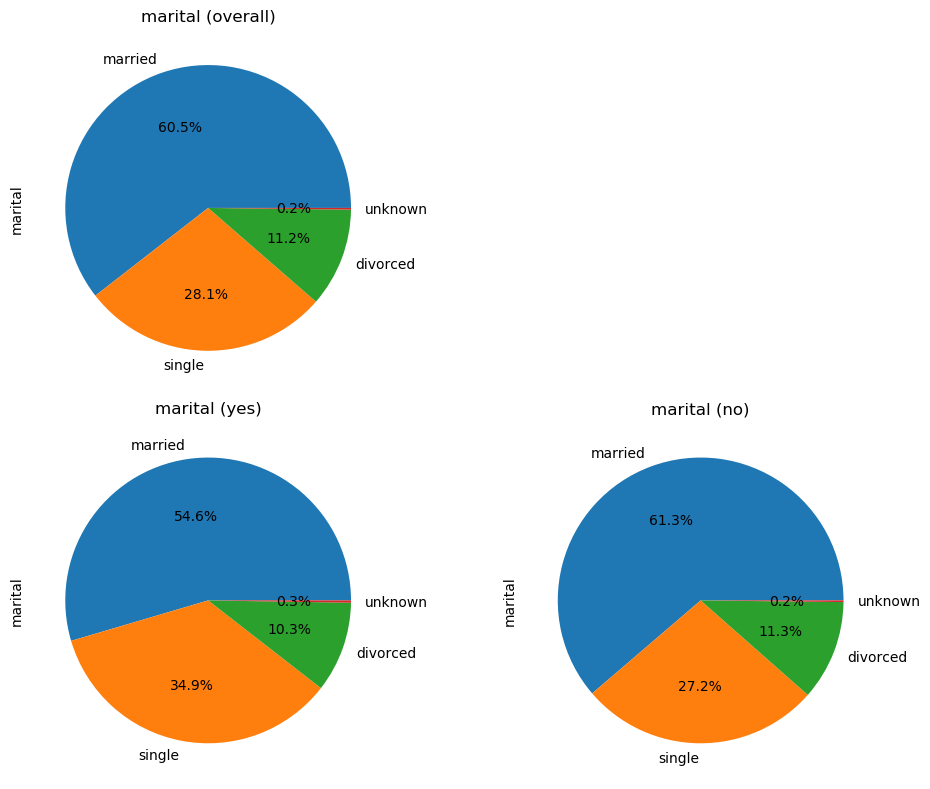

In [10]:

f = plt.figure(figsize=(10,8))

plt.subplot(221)
plt.title('marital (overall)')
dataset["marital"].value_counts().plot(kind = "pie", autopct='%1.1f%%')

plt.subplot(223)
plt.title('marital (yes)')
dataset["marital"][dataset["y"] == "yes"].value_counts().plot(kind = "pie", autopct='%1.1f%%')

ax2 = plt.subplot(224)
plt.title('marital (no)')
dataset["marital"][dataset["y"] == "no"].value_counts().plot(kind = "pie", autopct='%1.1f%%')
plt.tight_layout()

In [11]:
pd.DataFrame

pandas.core.frame.DataFrame

# Chi square test on marital status

In [12]:
marital_yes = dataset["marital"][dataset["y"] == "yes"].value_counts()
marital_yes
marital_no = dataset["marital"][dataset["y"] == "no"].value_counts()
marital_no

marital_yes_arranged = [marital_yes["single"], marital_yes["married"], marital_yes["divorced"],marital_yes["unknown"]]

marital_no_arranged = [marital_no["single"], marital_no["married"], marital_no["divorced"],marital_no["unknown"]]

obs = np.array([marital_yes_arranged, marital_no_arranged])
obs
chi2, p, dof, expected = stats.chi2_contingency(obs)
print("p value of chi-square test: ", p)

married     2532
single      1620
divorced     476
unknown       12
Name: marital, dtype: int64

married     22396
single       9948
divorced     4136
unknown        68
Name: marital, dtype: int64

array([[ 1620,  2532,   476,    12],
       [ 9948, 22396,  4136,    68]], dtype=int64)

p value of chi-square test:  2.068014648442211e-26


Analysis:
Chi-square test reveals that marital status is statistically significant at 95% confidence interval as the p value is less than 5 %.

We can see from the charts above that "singles" are on average more likely to positively respond to the campaign than those married or divorced.

# Education level

Text(0.5, 1.0, '% education (overall distribution)')

Text(0.5, 1.0, '% education (yes)')

Text(0.5, 1.0, '% education (no)')

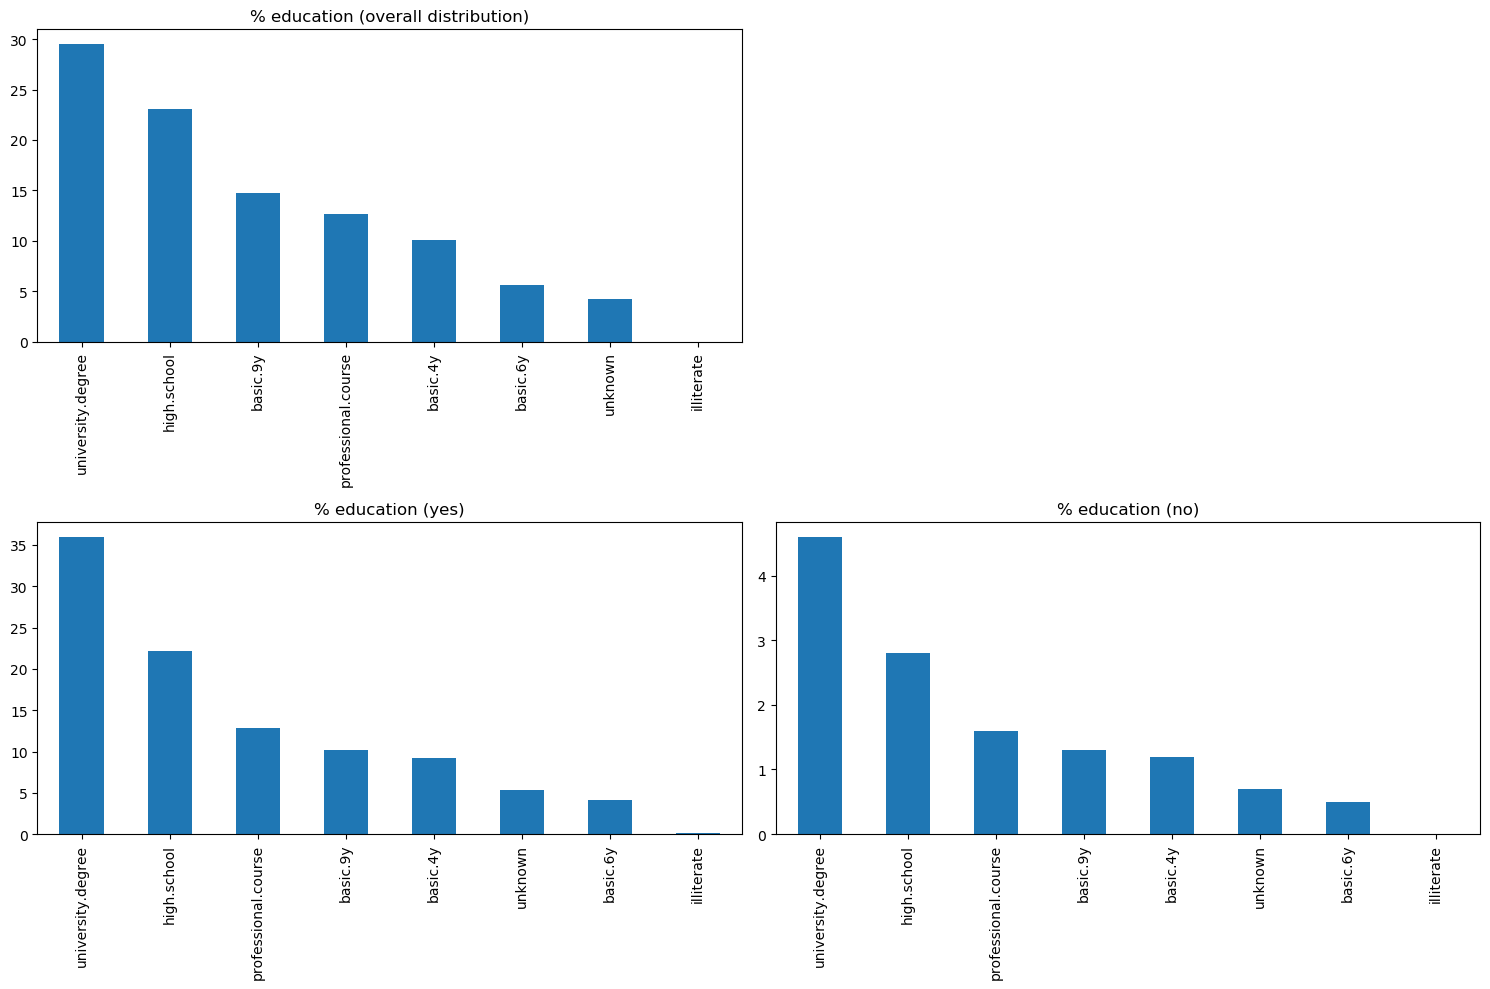

In [13]:
f = plt.figure(figsize=(15,10))

plt.subplot(221)
plt.title('% education (overall distribution)')
Total_counts = dataset["education"].value_counts()
Edu = round(Total_counts/(Total_counts.sum())*100,1)
Edu.plot(kind = "bar")

plt.subplot(223)
plt.title('% education (yes)')
Total_counts_yes = dataset["education"][dataset["y"] == "yes"].value_counts()
Edu_yes = round(Total_counts_yes/(Total_counts_yes.sum())*100,1)
Edu_yes.plot(kind = "bar")

plt.subplot(224)
plt.title('% education (no)')
Total_counts_no = dataset["education"][dataset["y"] == "no"].value_counts()
Edu_no = round(Total_counts_yes/(Total_counts_no.sum())*100,1)
Edu_no.plot(kind = "bar")

plt.savefig('education.png', dpi=1000)

plt.tight_layout()

# % of poeple with higher education in each of those who responded with "yes" vs. those with "no"

In [14]:
print("% Education_yes")
Edu_yes

print("% Education_no")
Edu_no

% Education_yes


university.degree      36.0
high.school            22.2
professional.course    12.8
basic.9y               10.2
basic.4y                9.2
unknown                 5.4
basic.6y                4.1
illiterate              0.1
Name: education, dtype: float64

% Education_no


university.degree      4.6
high.school            2.8
professional.course    1.6
basic.9y               1.3
basic.4y               1.2
unknown                0.7
basic.6y               0.5
illiterate             0.0
Name: education, dtype: float64

# Chi square test on education

In [15]:
print('Education lvl/subscribed')
education_yes = dataset["education"][dataset["y"] == "yes"].value_counts()
education_yes
print('Education lvl/did not subscribe')
education_no = dataset["education"][dataset["y"] == "no"].value_counts()
education_no


#education_yes_arranged = [education_yes["university.degree"], education_yes["high.school"],education_yes["professional.course"], education_yes["basic.9y"],education_yes["basic.4y"], education_yes["unknown"],education_yes["basic.6y"],education_yes["illiterate"]]

#education_no_arranged = [education_yes["university.degree"], education_no["high.school"],education_no["professional.course"], education_no["basic.9y"],education_no["basic.4y"], education_no["unknown"],education_no["basic.6y"],education_no["illiterate"]]

obs = np.array([education_yes, education_no])
obs
chi2, p, dof, expected = stats.chi2_contingency(obs)
print("p value of chi-square test: ", p)

Education lvl/subscribed


university.degree      1670
high.school            1031
professional.course     595
basic.9y                473
basic.4y                428
unknown                 251
basic.6y                188
illiterate                4
Name: education, dtype: int64

Education lvl/did not subscribe


university.degree      10498
high.school             8484
basic.9y                5572
professional.course     4648
basic.4y                3748
basic.6y                2104
unknown                 1480
illiterate                14
Name: education, dtype: int64

array([[ 1670,  1031,   595,   473,   428,   251,   188,     4],
       [10498,  8484,  5572,  4648,  3748,  2104,  1480,    14]],
      dtype=int64)

p value of chi-square test:  7.885332471951764e-23


Analysis:
The chi square test reveals that education level is not statistically significant at 95% confidence interval as p value is larger than 5 %. 

# Default on past loans

Text(0.5, 1.0, 'default (overall)')

Text(0.5, 1.0, 'default (yes)')

Text(0.5, 1.0, 'default (no)')

Distribution of variables in loan default: 


no         32588
unknown     8597
yes            3
Name: default, dtype: int64

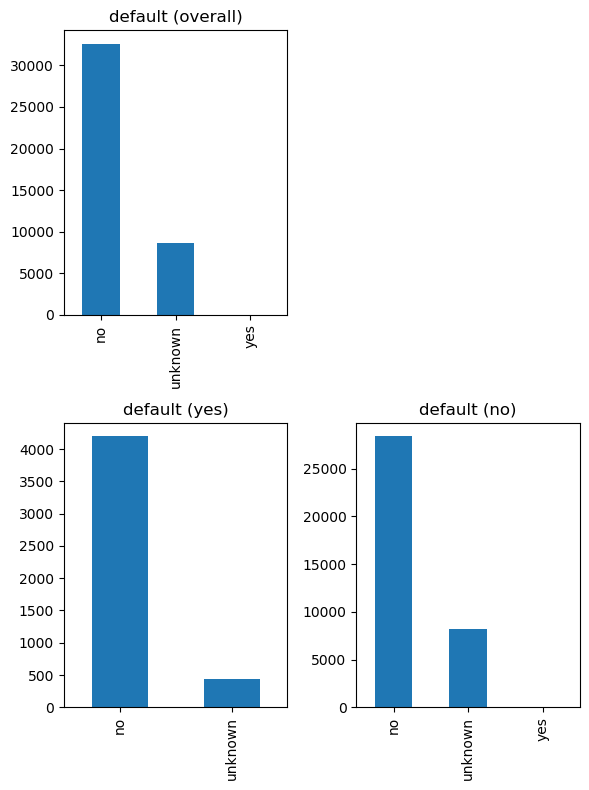

In [16]:
f = plt.figure(figsize=(6,8))

plt.subplot(221)
plt.title('default (overall)')
dataset["default"].value_counts().plot(kind = "bar")

plt.subplot(223)
plt.title('default (yes)')
dataset["default"][dataset["y"] == "yes"].value_counts().plot(kind = "bar")

plt.subplot(224)
plt.title('default (no)')
dataset["default"][dataset["y"] == "no"].value_counts().plot(kind = "bar")
plt.tight_layout()

print("Distribution of variables in loan default: ")
dataset["default"].value_counts()

Analysis:
The Loan default variable will be dropped, as it does not add any new information to the model. From the table above and the plots, it is observed that most of the values are either "no","unknown" or missing. Out of 41,188 people,only 3 have defaulted in their previous loans.

# Housing

Text(0.5, 1.0, 'housing (overall)')

Text(0.5, 1.0, 'housing (yes)')

Text(0.5, 1.0, 'housing (no)')

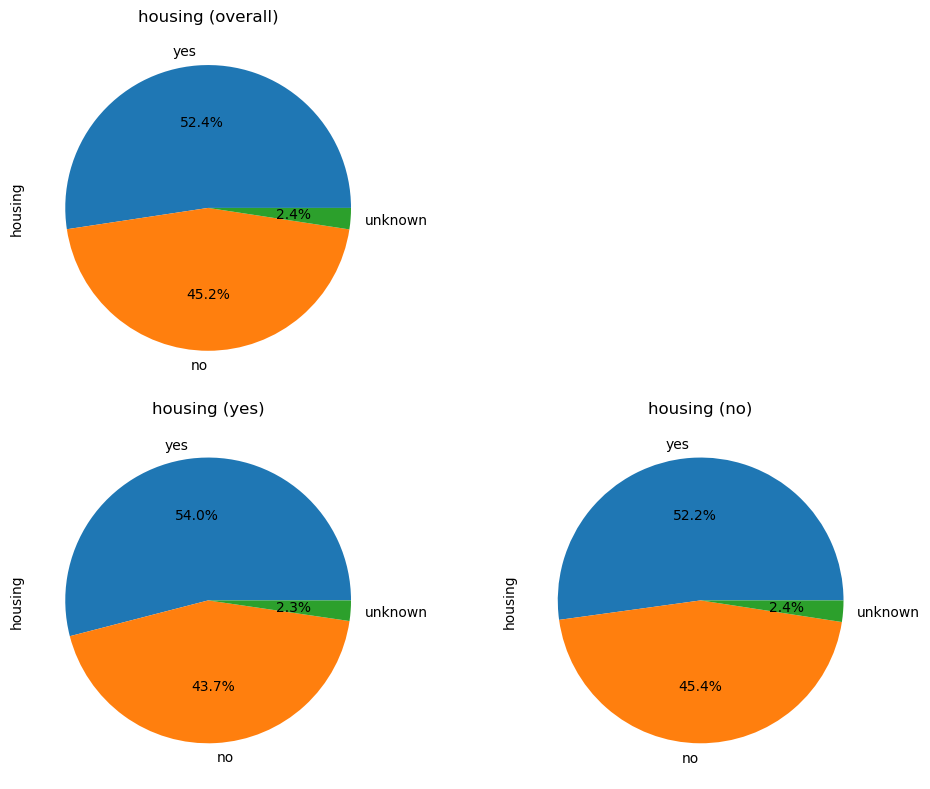

In [17]:
f = plt.figure(figsize=(10,8))

plt.subplot(221)
plt.title('housing (overall)')
dataset["housing"].value_counts().plot(kind = "pie", autopct='%1.1f%%')

plt.subplot(223)
plt.title('housing (yes)')
dataset["housing"][dataset["y"] == "yes"].value_counts().plot(kind = "pie", autopct='%1.1f%%')

plt.subplot(224)
plt.title('housing (no)')
dataset["housing"][dataset["y"] == "no"].value_counts().plot(kind = "pie", autopct='%1.1f%%')
plt.tight_layout()

# Chi square test on housing

In [18]:
housing_yes = dataset["housing"][dataset["y"] == "yes"].value_counts()
housing_yes
housing_no = dataset["housing"][dataset["y"] == "no"].value_counts()
housing_no

housing_yes_arranged = [housing_yes["yes"], housing_yes["no"]]

housing_no_arranged = [housing_no["yes"], housing_no["no"]]

obs = np.array([housing_yes_arranged, housing_no_arranged])
obs
chi2, p, dof, expected = stats.chi2_contingency(obs)
print("p value of chi-square test: ", p)

yes        2507
no         2026
unknown     107
Name: housing, dtype: int64

yes        19069
no         16596
unknown      883
Name: housing, dtype: int64

array([[ 2507,  2026],
       [19069, 16596]], dtype=int64)

p value of chi-square test:  0.02020853196455713


Analysis:
The chi square test reveals that housing is statistically significant at 95% confidence interval as p value is less than 5 %

# Personal Loan

Text(0.5, 1.0, 'loan (overall)')

Text(0.5, 1.0, 'loan (yes)')

Text(0.5, 1.0, 'loan (no)')

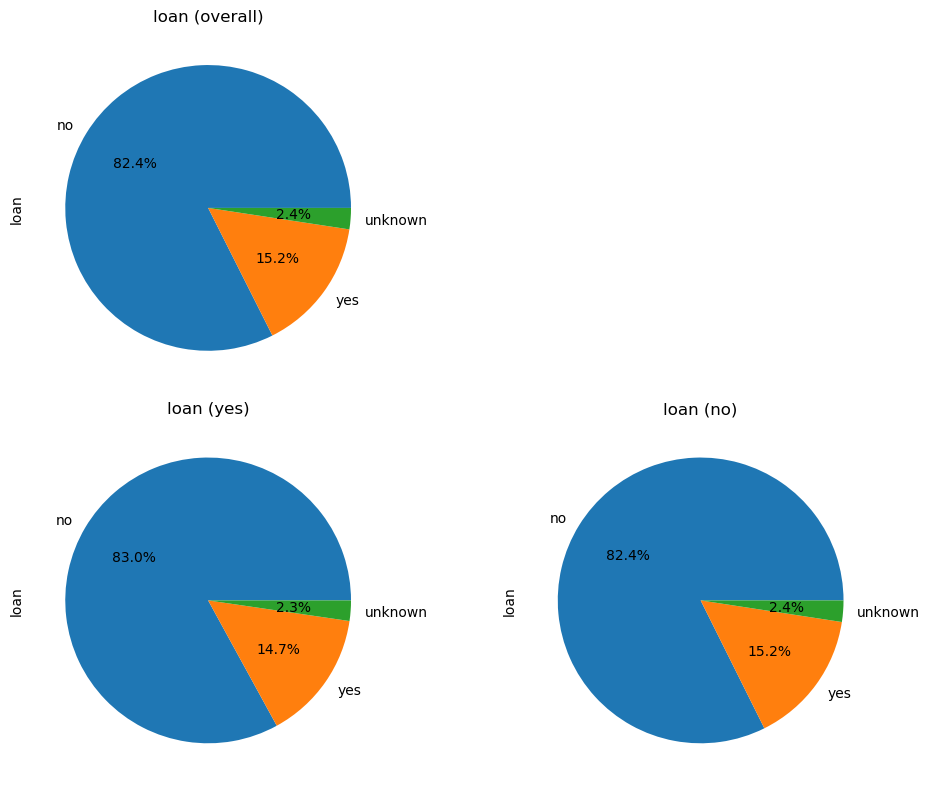

In [19]:
f = plt.figure(figsize=(10,8))

plt.subplot(221)
plt.title('loan (overall)')
dataset["loan"].value_counts().plot(kind = "pie", autopct='%1.1f%%')

plt.subplot(223)
plt.title('loan (yes)')
dataset["loan"][dataset["y"] == "yes"].value_counts().plot(kind = "pie", autopct='%1.1f%%')

plt.subplot(224)
plt.title('loan (no)')
dataset["loan"][dataset["y"] == "no"].value_counts().plot(kind = "pie", autopct='%1.1f%%')
plt.tight_layout()

# Chi square test on personal loans

In [20]:
loan_yes = dataset["loan"][dataset["y"] == "yes"].value_counts()
loan_yes
loan_no = dataset["loan"][dataset["y"] == "no"].value_counts()
loan_no

loan_yes_arranged = [loan_yes["yes"], loan_yes["no"]]

loan_no_arranged = [loan_no["yes"], loan_no["no"]]

obs = np.array([loan_yes_arranged, loan_no_arranged])
obs
chi2, p, dof, expected = stats.chi2_contingency(obs)
print("p value of chi-square test: ", p)

no         3850
yes         683
unknown     107
Name: loan, dtype: int64

no         30100
yes         5565
unknown      883
Name: loan, dtype: int64

array([[  683,  3850],
       [ 5565, 30100]], dtype=int64)

p value of chi-square test:  0.35921398426348206



Analysis:
The loan variable shall be dropped as it does not add any additional information. The p value of chi-square test is greater than 0.05, so it is not statistically significant at 95% confidence level.

# Contact

Text(0.5, 1.0, 'contact (overall)')

Text(0.5, 1.0, 'contact (yes)')

Text(0.5, 1.0, 'contact (no)')

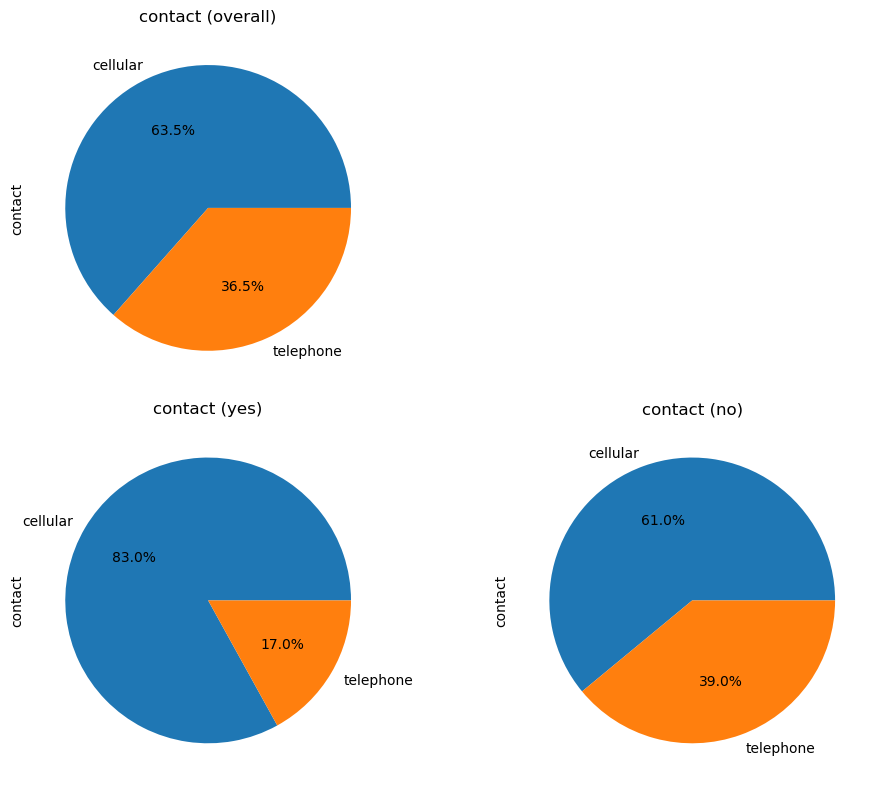

In [21]:
f = plt.figure(figsize=(10,8))

plt.subplot(221)
plt.title('contact (overall)')
dataset["contact"].value_counts().plot(kind = "pie", autopct='%1.1f%%')

plt.subplot(223)
plt.title('contact (yes)')
dataset["contact"][dataset["y"] == "yes"].value_counts().plot(kind = "pie", autopct='%1.1f%%')

plt.subplot(224)
plt.title('contact (no)')
dataset["contact"][dataset["y"] == "no"].value_counts().plot(kind = "pie", autopct='%1.1f%%')
plt.tight_layout()

# Chi square test on contact communication type

In [22]:
contact_yes = dataset["contact"][dataset["y"] == "yes"].value_counts()
contact_yes
contact_no = dataset["contact"][dataset["y"] == "no"].value_counts()
contact_no

obs = np.array([contact_yes, contact_no])
obs
chi2, p, dof, expected = stats.chi2_contingency(obs)
print("p value of chi-square test: ", p)

cellular     3853
telephone     787
Name: contact, dtype: int64

cellular     22291
telephone    14257
Name: contact, dtype: int64

array([[ 3853,   787],
       [22291, 14257]], dtype=int64)

p value of chi-square test:  1.5259856523129964e-189


Analysis:
The Contact variable (communication type) is statistically significant at 95% confidence interval from chi squeare test.It can be observed that a people who were contacted by cell phone had a higher proportion of positive responses to the campaign.

# Month

Text(0.5, 1.0, '% month (overall)')

Text(0.5, 1.0, '% month (no)')

Text(0.5, 1.0, '% month (yes)')

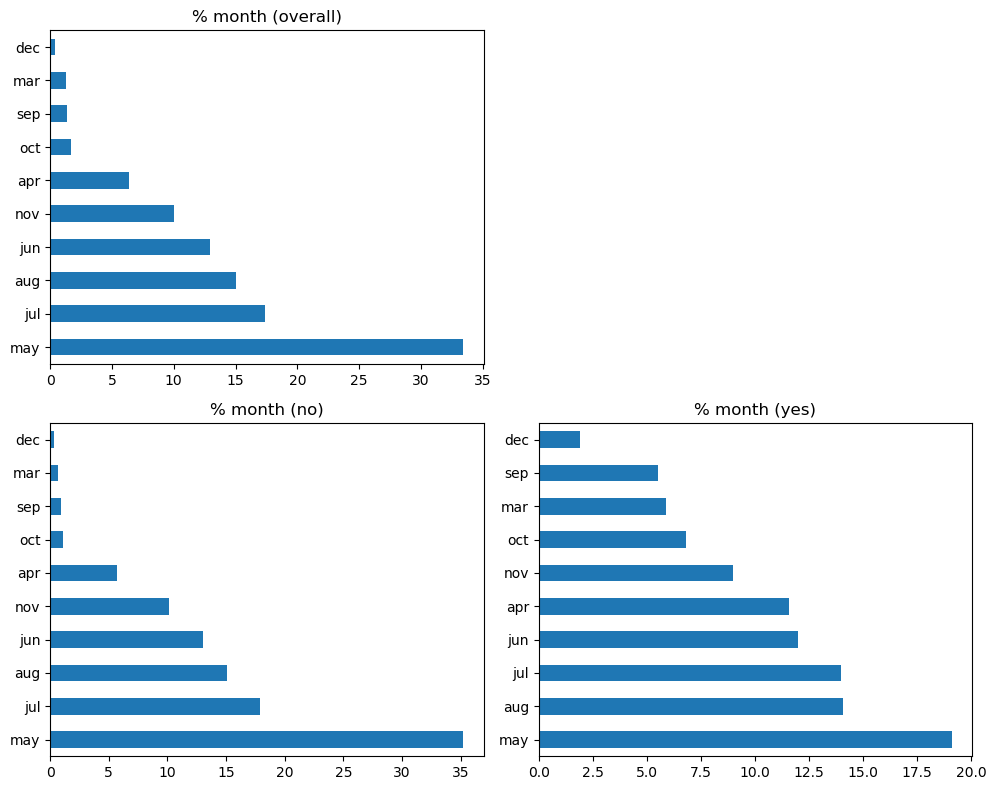

In [23]:

f = plt.figure(figsize=(10,8))
plt.subplot(221)
plt.title('% month (overall)')
month_contact_overall = dataset["month"].value_counts()
month_overall = round(month_contact_overall/(month_contact_overall.sum())*100,1)
month_overall.plot(kind = "barh")

plt.subplot(223)
plt.title('% month (no)')
month_contact_no = dataset["month"][dataset["y"] == "no"].value_counts()
month_no = round(month_contact_no/(month_contact_no.sum())*100,1)
month_no.plot(kind = "barh")


plt.subplot(224)
plt.title('% month (yes)')
month_contact_yes = dataset["month"][dataset["y"] == "yes"].value_counts()
month_yes = round(month_contact_yes/(month_contact_yes.sum())*100,1)
month_yes.plot(kind = "barh")

plt.tight_layout()

# Chi square test on month contacted

In [24]:
month_yes = dataset["month"][dataset["y"] == "yes"].value_counts()
month_yes
month_no = dataset["month"][dataset["y"] == "no"].value_counts()
month_no

month_yes_arranged = [month_yes["may"], month_yes["aug"], month_yes["jul"], month_yes["jun"], month_yes["apr"], month_yes["nov"], month_yes["oct"], month_yes["mar"], month_yes["sep"], month_yes["dec"]]

month_no_arranged = [month_no["may"], month_no["aug"], month_no["jul"], month_no["jun"], month_no["apr"], month_no["nov"], month_no["oct"], month_yes["mar"], month_no["sep"], month_no["dec"]]

obs = np.array([month_yes_arranged, month_no_arranged])
obs
chi2, p, dof, expected = stats.chi2_contingency(obs)
print("p value of chi-square test: ", p)

may    886
aug    655
jul    649
jun    559
apr    539
nov    416
oct    315
mar    276
sep    256
dec     89
Name: month, dtype: int64

may    12883
jul     6525
aug     5523
jun     4759
nov     3685
apr     2093
oct      403
sep      314
mar      270
dec       93
Name: month, dtype: int64

array([[  886,   655,   649,   559,   539,   416,   315,   276,   256,
           89],
       [12883,  5523,  6525,  4759,  2093,  3685,   403,   276,   314,
           93]], dtype=int64)

p value of chi-square test:  0.0


Analysis:The Month variable is statistically significant at 95% confidence interval from chi squeare test. It can be observed that there are higher conversion rates in May, June, July and August.


# Duration

Text(0.5, 1.0, 'duration (overall)')

Text(0.5, 1.0, 'duration (yes)')

Text(0.5, 1.0, 'duration (no)')

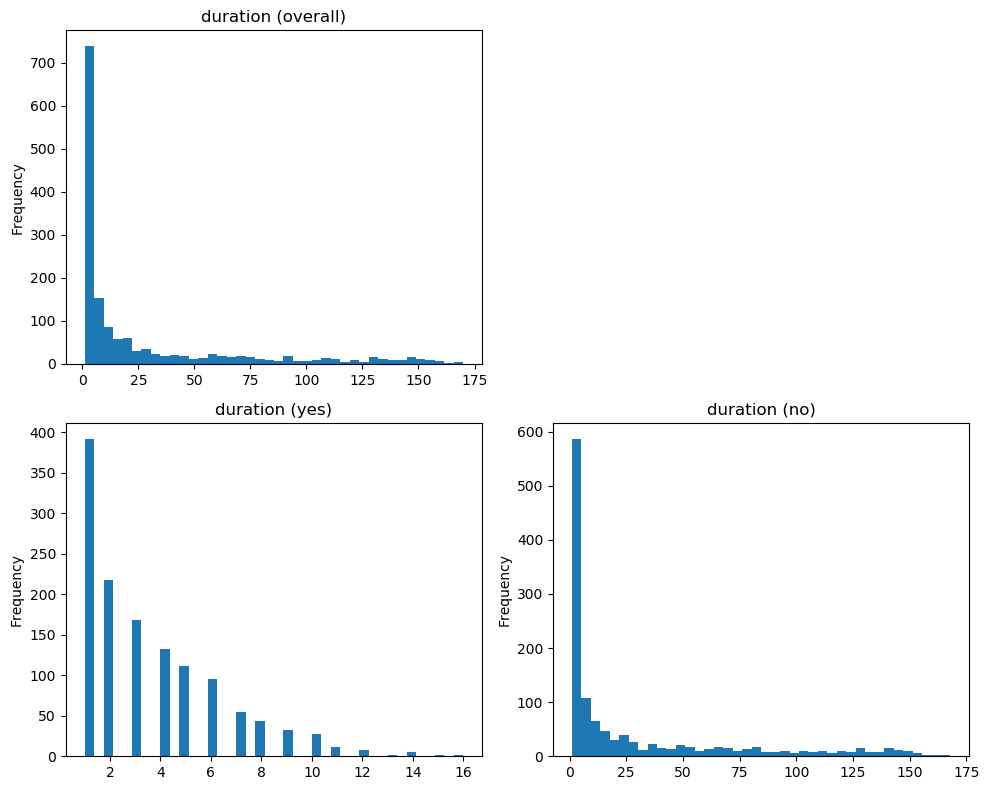

In [25]:

f = plt.figure(figsize=(10,8))

plt.subplot(221)
plt.title('duration (overall)')
dataset["duration"].value_counts().plot(kind = "hist", bins = 40)

plt.subplot(223)
plt.title('duration (yes)')
dataset["duration"][dataset["y"] == "yes"].value_counts().plot(kind = "hist", bins = 40)

plt.subplot(224)
plt.title('duration (no)')
dataset["duration"][dataset["y"] == "no"].value_counts().plot(kind = "hist", bins = 40)
plt.tight_layout()


Analysis:
On average,the default rate was lower among people who responded positively, note the long tail in "duration (no)".

The call duration variable can not be known ahead of the call. In this case, this variable needs to be dropped for predictive purposes.

# Campaign

Text(0.5, 1.0, '% campaign (overall)')

Text(0.5, 1.0, '% campaign (yes)')

Text(0.5, 1.0, '% campaign (no)')

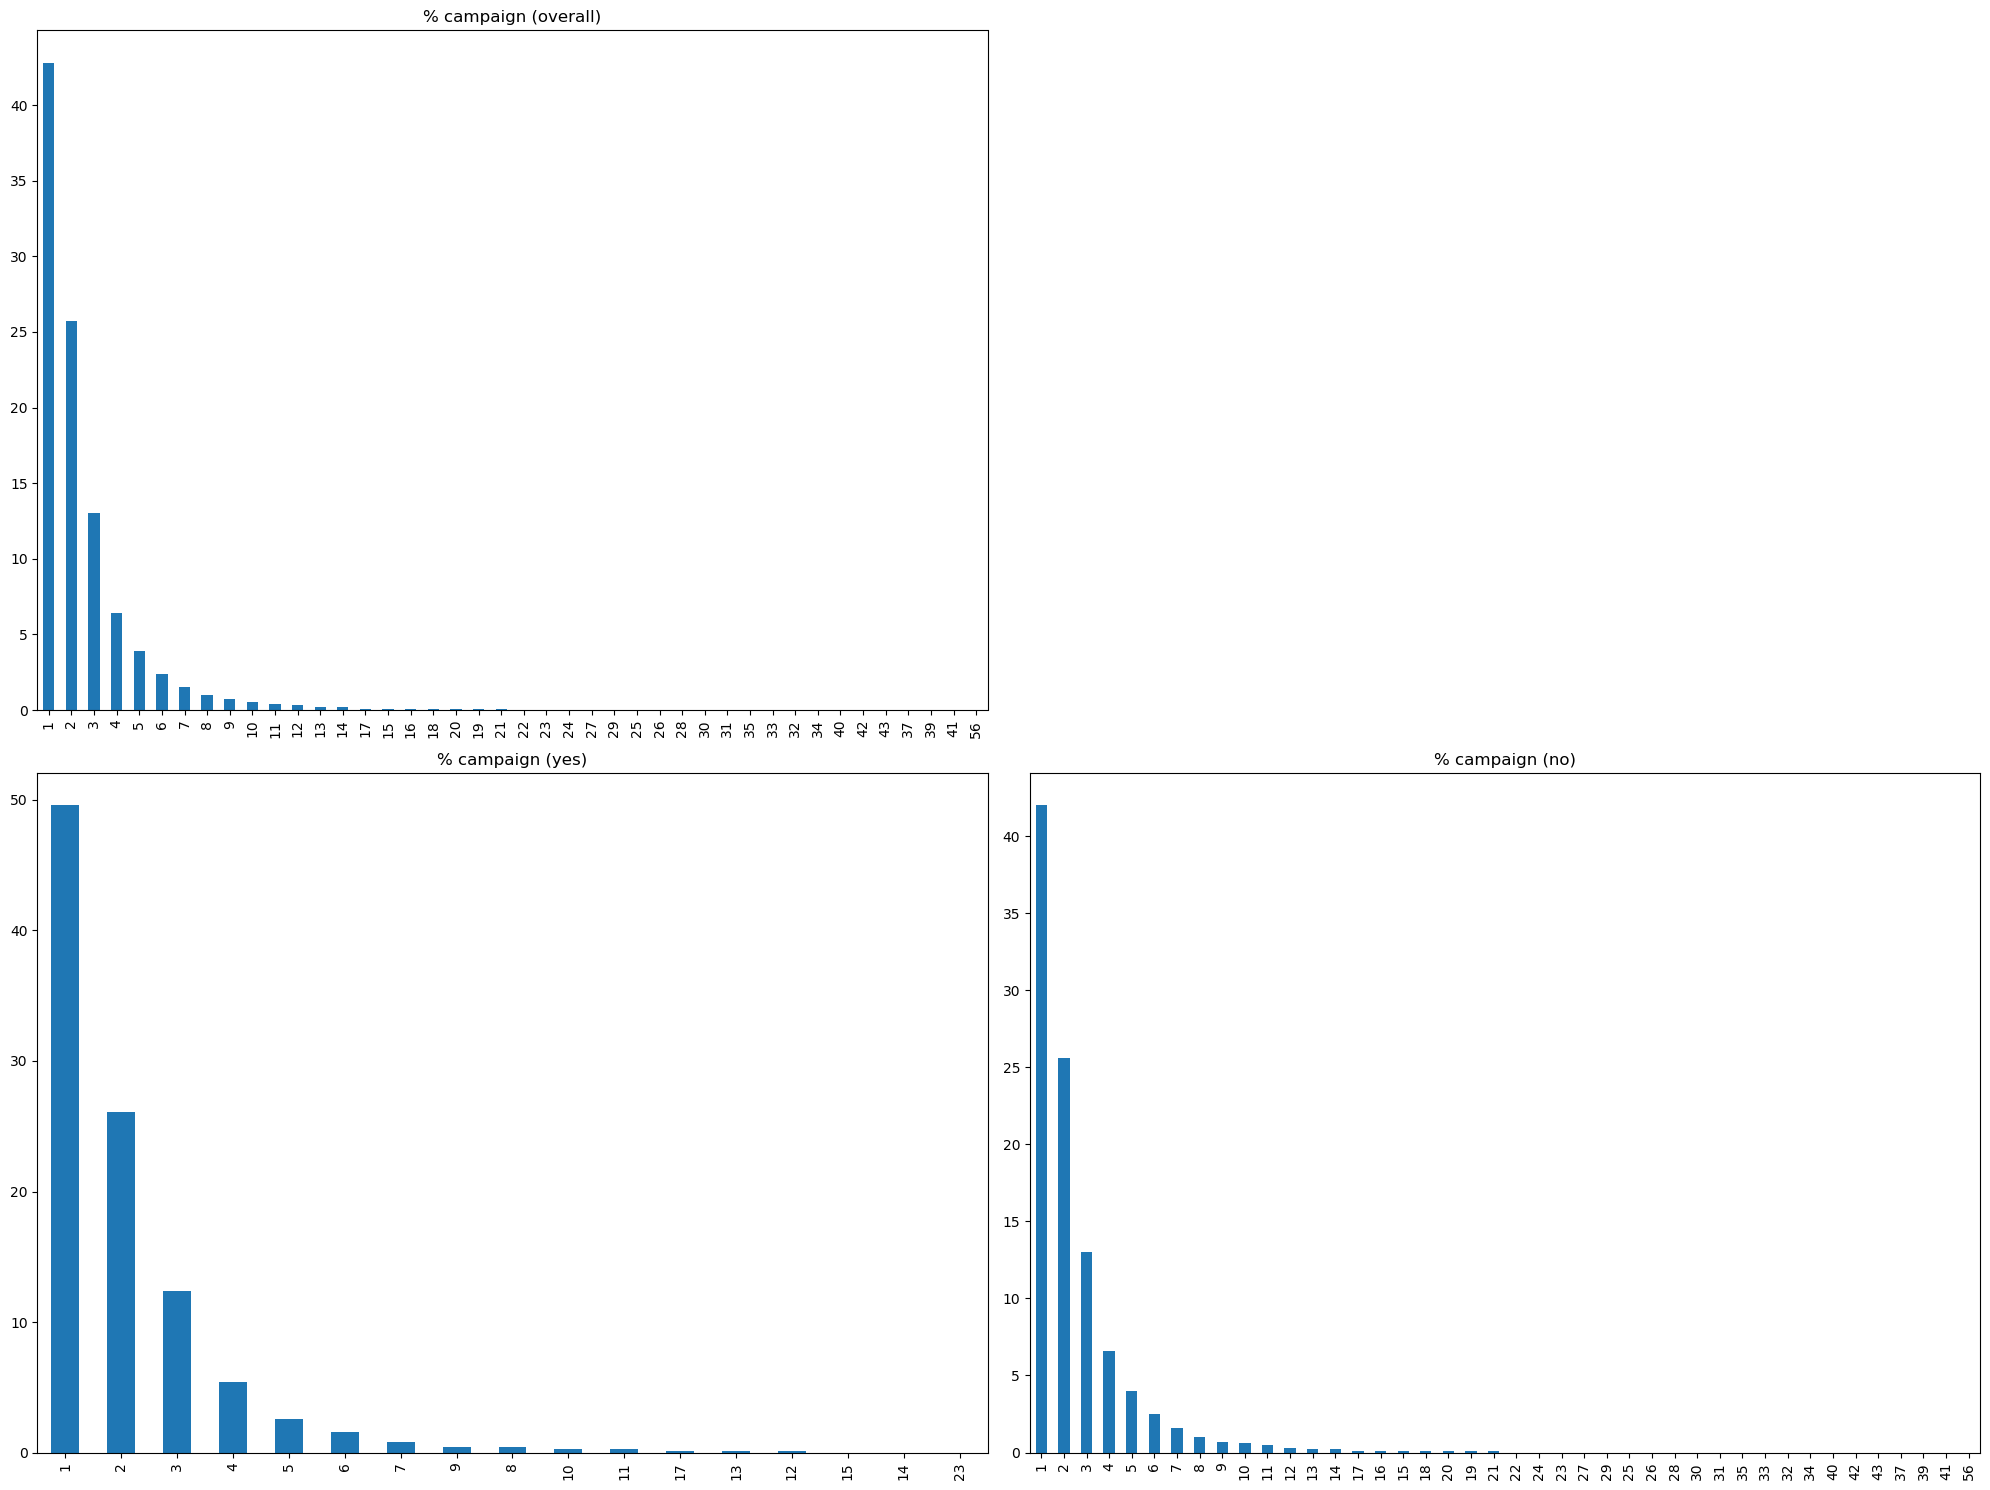

In [26]:
f = plt.figure(figsize=(20,15))

plt.subplot(221)
plt.title('% campaign (overall)')
campaign_overall_contact = dataset["campaign"].value_counts()
campaign_overall = round(campaign_overall_contact /(campaign_overall_contact.sum())*100,1)
campaign_overall.plot(kind = "bar")

plt.subplot(223)
plt.title('% campaign (yes)')
campaign_yes_contact = dataset["campaign"][dataset["y"] == "yes"].value_counts()
campaign_yes = round(campaign_yes_contact /(campaign_yes_contact.sum())*100,1)
campaign_yes.plot(kind = "bar")

plt.subplot(224)
plt.title('% campaign (no)')
campaign_no_contact = dataset["campaign"][dataset["y"] == "no"].value_counts()
campaign_no = round(campaign_no_contact /(campaign_no_contact.sum())*100,1)
campaign_no.plot(kind = "bar")

plt.tight_layout()

# Applying Difference of mean test on campaigns (# of contacts with clients)

In [27]:
campaign_yes = dataset["campaign"][dataset["y"] == "yes"]
campaign_yes = dataset["campaign"][dataset["y"] == "no"]

rows_yes = campaign_yes.shape[0]
rows_no = campaign_no.shape[0]

mean_campaign_yes = np.mean(campaign_yes)
mean_campaign_no = np.mean(campaign_no)

std_dev_campaign_yes = np.std(campaign_yes)
std_dev_campaign_no = np.std(campaign_no)

std_error = (std_dev_campaign_yes**2/rows_yes + std_dev_campaign_no**2/rows_no)**0.5
Difference_mean = mean_campaign_yes - mean_campaign_no


Upper_bound_95_confidence_Interval = round(Difference_mean + 1.96*std_error, 3)
Lower_bound_95_confidence_Interval = round(Difference_mean - 1.96*std_error, 3)

print("The 95% confidence interval of the difference of means is [", Lower_bound_95_confidence_Interval, ", ", Upper_bound_95_confidence_Interval, "]")

The 95% confidence interval of the difference of means is [ -2.033 ,  2.562 ]


Analysis: "#" of Campaign contact is not statistically significant at 95% confidence interval as the 95% confidence interval includes 0.

# Previous (contact)

Text(0.5, 1.0, '% previously contacted (overall)')

Text(0.5, 1.0, '% previously contacted (yes)')

Text(0.5, 1.0, '% previously contacted (no)')

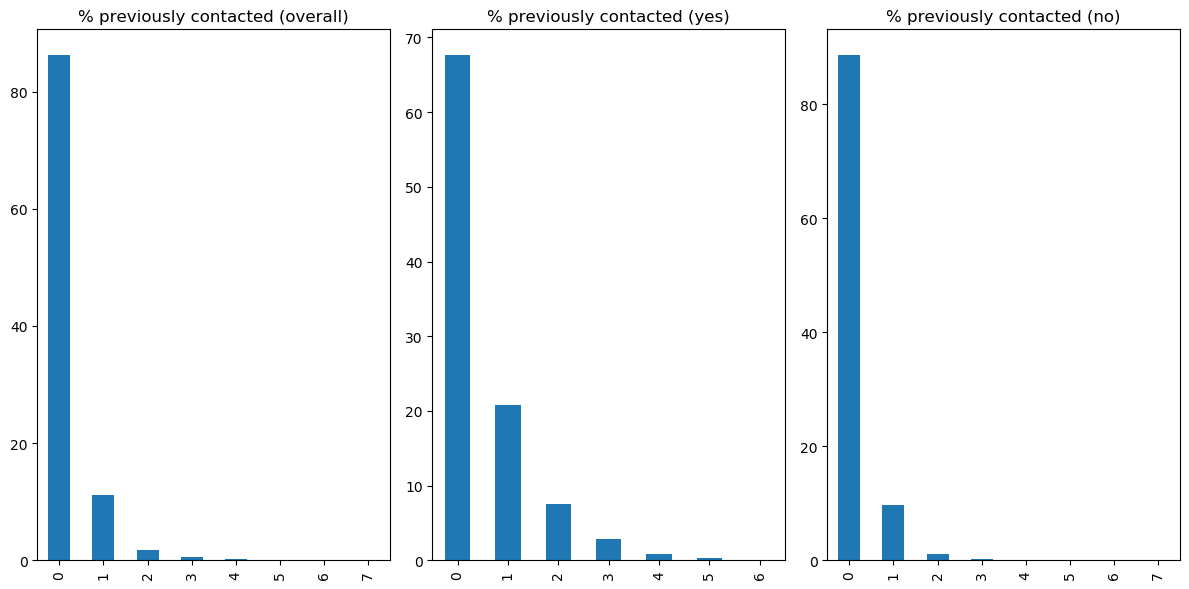

In [28]:
f = plt.figure(figsize=(12,6))

plt.subplot(131)
plt.title('% previously contacted (overall)')
previous_contact_overall = dataset["previous"].value_counts()
previous_overall = round(previous_contact_overall/(previous_contact_overall.sum())*100,1)
previous_overall.plot(kind = "bar")

plt.subplot(132)
plt.title('% previously contacted (yes)')
previous_contact_yes = dataset["previous"][dataset["y"] == "yes"].value_counts()
previous_yes = round(previous_contact_yes/(previous_contact_yes.sum())*100,1)
previous_yes.plot(kind = "bar")

plt.subplot(133)
plt.title('% previously contacted (no)')
previous_contact_no = dataset["previous"][dataset["y"] == "no"].value_counts()
previous_no = round(previous_contact_no/(previous_contact_no.sum())*100,1)
previous_no.plot(kind = "bar")

plt.tight_layout()

# Difference of mean test on number of times contacted previously

In [29]:
previous_yes = dataset["previous"][dataset["y"] == "yes"]
previous_no = dataset["previous"][dataset["y"] == "no"]

rows_yes = previous_yes.shape[0]
rows_no = previous_no.shape[0]

mean_previous_yes = np.mean(previous_yes)
mean_previous_no = np.mean(previous_no)

std_dev_previous_yes = np.std(previous_yes)
std_dev_previous_no = np.std(previous_no)

std_error = (std_dev_previous_yes**2/rows_yes + std_dev_previous_no**2/rows_no)**0.5
Difference_mean = mean_previous_yes - mean_previous_no

Upper_bound_95_confidence_Interval = round(Difference_mean + 1.96*std_error, 3)
Lower_bound_95_confidence_Interval = round(Difference_mean - 1.96*std_error, 3)

print("The 95% confidence interval of the difference of means is [", Lower_bound_95_confidence_Interval, ", ", Upper_bound_95_confidence_Interval, "]")

The 95% confidence interval of the difference of means is [ 0.335 ,  0.385 ]


Analysis:
The difference of in mean test reveals that the number of times clients were previously contacted is statistically significant at 95% confidence interval as the 95% confidence interval does not include 0. Also, from the above charts, people who were contacted more than once had a higher likelihood of converting.

# Outcome of the previous marketing campaign (poutcome)

Text(0.5, 1.0, '% poutcome (overall)')

Text(0.5, 1.0, '% poutcome (yes)')

Text(0.5, 1.0, '% poutcome (no)')

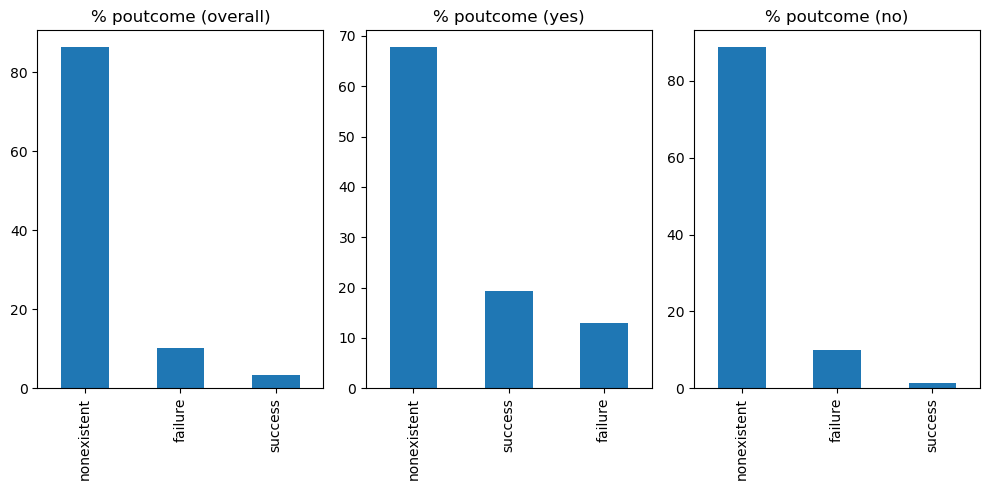

In [30]:
f = plt.figure(figsize=(10,5))

plt.subplot(131)
plt.title('% poutcome (overall)')
poutcome_past_overall = dataset["poutcome"].value_counts()
poutcome_overall = round(poutcome_past_overall/(poutcome_past_overall.sum())*100,1)
poutcome_overall.plot(kind = "bar")

plt.subplot(132)
plt.title('% poutcome (yes)')
poutcome_past_yes = dataset["poutcome"][dataset["y"] == "yes"].value_counts()
poutcome_yes = round(poutcome_past_yes/(poutcome_past_yes.sum())*100,1)
poutcome_yes.plot(kind = "bar")

plt.subplot(133)
plt.title('% poutcome (no)')
poutcome_past_no = dataset["poutcome"][dataset["y"] == "no"].value_counts()
poutcome_no = round(poutcome_past_no/(poutcome_past_no.sum())*100,1)
poutcome_no.plot(kind = "bar")

plt.tight_layout()

# Chi square test on previous marketing campaigns (poutcome)

In [31]:
poutcome_yes = dataset["poutcome"][dataset["y"] == "yes"].value_counts()
poutcome_yes
poutcome_no = dataset["poutcome"][dataset["y"] == "no"].value_counts()
poutcome_no

poutcome_yes_arranged = [poutcome_yes["nonexistent"], poutcome_yes["success"], poutcome_yes["failure"]]
poutcome_no_arranged = [poutcome_no["nonexistent"], poutcome_no["success"], poutcome_no["failure"]]

obs = np.array([poutcome_yes_arranged, poutcome_no_arranged])
obs
chi2, p, dof, expected = stats.chi2_contingency(obs)
print("p value of chi-square test: ", p)

nonexistent    3141
success         894
failure         605
Name: poutcome, dtype: int64

nonexistent    32422
failure         3647
success          479
Name: poutcome, dtype: int64

array([[ 3141,   894,   605],
       [32422,   479,  3647]], dtype=int64)

p value of chi-square test:  0.0


Analysis:
The Success of previous marketing campaigns variable is statistically significant at 95% confidence interval from chi squeare test as p value is less than 5 %. ( 0.0) It will not be considered.

# Summary of variable analysis:
1) age (Difference of means is statistically significant at 95% confidence interval),

2) Job (Statistically signicant at 95% confidence level, proportionally higher response rate from job categories: Admin, Retired, Students),

3) marital status (statistically signicant at 95% confidence level, singles are proportionally more responsive),

4) education level (statistically significant at 95% confidence level, people with higher education; university.degree, high.school & professional.course responded more positively)

5) default (to be dropped, not statistical significant at 95% confidence interval.)

6) housing (statistically signicant at 95% confidence level)

7) loan (to be dropped, not statistically significant at 95% confidence interval)

8) contact (statistically significant at 95% confidence level, higher conversion rates for cellular phone),

9) Months contacted (statistically significant at 95% confidence level, higher conversion rates in May, June, July and August)

10) Day of week: (statistically significant at 95% confidence level, higher conversion rates: Thursday, Tuesday and Wednesday)

11) Duration of call (to be dropped as variable cannot be know ahead of call)

12) campaign (It is not statistically significant at 95% confidence interval and so it can be dropped)

13) pdays (To be dropped as it is not statistically significant at 95% confidence interval)

14) previous (statistically significant at 95% confidence level, people who were contacted more than once had a higher likelihood of converting.)

15) poutcome (success in previous campaigns is statistically significant at 95% confidence level)



features to be keps = age;job;marital;education;housing;contact;month;day;duration( will be used for new features> do not drop);previous,poutcome